In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt  

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

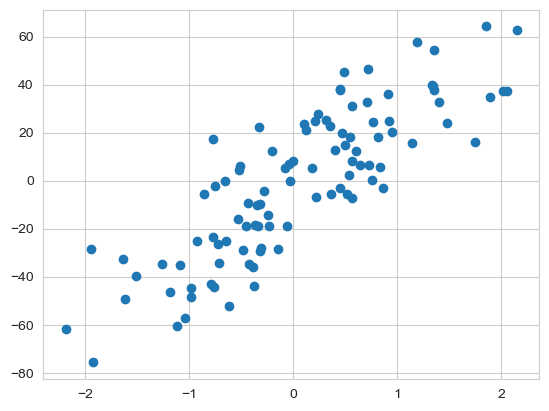

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [5]:
X_train.ravel().shape

(80,)

# Using Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
lr.intercept_, lr.coef_

(np.float64(-2.2710144261783825), array([28.12597332]))

In [8]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661012

# Using Custom Gradient Descend (For Single Column Data)

In [9]:
class GradientDescent:
    def __init__(self,learning_rate=0.1,epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.intercept = None
        self.coef = None
        
    def fit(self,X_train,y_train):
        
        # 1. Initialize Intercept and Coef
        self.intercept = np.random.random()
        self.coef = np.random.random()
        X_train = X_train.ravel()
        
        for i in range(self.epochs):
            # 2. Calculate Gradeint
            dL_by_dIntercept = -2 * np.sum(y_train - (self.coef * X_train) - self.intercept)
            dL_by_dCoef = -2 * np.sum((y_train - (self.coef * X_train) - self.intercept)  * X_train )
            
            # 3. Update Intercept and Coef
            self.intercept -= (self.learning_rate * dL_by_dIntercept)
            self.coef -= (self.learning_rate * dL_by_dCoef)
        
    def predict(self,X_test):
        return self.coef * X_test + self.intercept

In [10]:
gd = GradientDescent(learning_rate=0.01,epochs=100)

In [11]:
gd.fit(X_train,y_train)

In [12]:
y_pred = gd.predict(X_test)

In [13]:
y_pred

array([[ 21.09901593],
       [ 18.03495551],
       [ 18.23747414],
       [ -8.10292651],
       [ 15.72634513],
       [ 58.21059953],
       [-15.03324179],
       [-11.33105581],
       [-15.81005402],
       [ -8.8082183 ],
       [-23.57512364],
       [ 14.78144416],
       [ 12.70150681],
       [-23.8893975 ],
       [-22.30769518],
       [-16.670531  ],
       [ 24.52827391],
       [-16.98551717],
       [ -3.88916883],
       [-12.01966768]])

In [14]:
r2_score(y_test, y_pred)

0.6345158782661013